# THT2
## Part 2
## Table of Contents:

* [Part 2A](#2A)
    - [Problem (d)](#d(i))
        - [d(i)](#d(i))
        - [d(ii)](#d(ii))
    
    - [Problem (f)](#f(i))
        - [f(i)](#f(i))
        - [f(ii)](#f(ii))
        - [f(iii)](#f(iii))
        - [f(iv)](#f(iv))
        - [f(v)](#f(v))
* [Part 2B](#2B)
    - [Table 2](#Table-2)
    - [Problem (c)](#(c))
    - [Problem (d)](#(d))
    - [Problem (e/f)](#(e/f))
    - [Problem (g/h)](#(g/h))
    


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# 2A
# d(i)
[back to top](#THT2)

In [2]:
n=1265
n1=659
n2=554
n3=52

t1 = n1/n
t2 = n2/n
t3 = n3/n

In [3]:
T = np.array([t1,t2,t3])
T.sum()

1.0

In [4]:
c1 = (t1*(1-t1))/n
c2 = -(t1*t2)/n
c3 = -(t1*t3)/n
c4 = -(t1*t2)/n
c5 = (t2*(1-t2))/n
c6 = -(t2*t3)/n
c7 = -(t1*t3)/n
c8 = -(t2*t3)/n
c9 = (t3*(1-t3))/n

cov_matrix = np.array([[c1, c2, c3],
                       [c4, c5, c6],
                       [c7, c8, c9]])
cov_matrix

array([[ 1.97281546e-04, -1.80353096e-04, -1.69284495e-05],
       [-1.80353096e-04,  1.94584297e-04, -1.42312003e-05],
       [-1.69284495e-05, -1.42312003e-05,  3.11596498e-05]])

In [5]:
gamma_mle = round((t1 - t2), 4)
gamma_mle

0.083

In [6]:
se_t1 = c1**(1/2)
se_t2 = c5**(1/2)
se_t3 = c9**(1/2)
print(se_t1, se_t2, se_t3)

0.01404569492122652 0.013949347535362836 0.005582082926184541


In [7]:
data =  {'Biden': [t1, se_t1],
         'Trump' : [t2, se_t2],
         'other' : [t3, se_t3]
}

df = pd.DataFrame.from_dict(data, orient='index',
                            columns=['likelihood', 'sd/se']).round(3)
df

,likelihood,sd/se
Biden,0.521,0.014
Trump,0.438,0.014
other,0.041,0.006


$$ SE(\hat{\gamma}) = \sqrt{Var(\hat\gamma)} = \sqrt{var(\hat\theta_1 - \hat\theta_2)} $$

In [8]:
var_gamma_hat = (c1+c5)-(2*c2)
se_gamma_hat = round((var_gamma_hat**(1/2)), 4)
print(se_gamma_hat)

0.0274


# d(ii)
[back to top](#THT2)

In [9]:
## 99.9% Lower-confidence bound for gamma
from scipy.stats import norm
alpha = 0.001
LCB = gamma_mle - (norm.ppf(1-alpha)*se_gamma_hat)
print(round(LCB, 4))

-0.0017


# f(i)
[back to top](#THT2)

In [10]:
from scipy import stats

In [11]:
M = 300000
g_j = stats.gamma.rvs(1, size=3)
theta_j = g_j / np.sum(g_j)
print(g_j, theta_j)

[2.94053297 0.22856866 3.25314493] [0.45786672 0.03559014 0.50654314]


In [12]:
prior_alpha = np.array([0.01, 0.01, 0.01])
prior = stats.dirichlet.rvs(prior_alpha, size=1)
prior

array([[7.23433915e-06, 9.99992766e-01, 1.70492524e-51]])

In [13]:
N = np.array([659, 554, 52])
# sampling = stats.dirichlet.rvs(N, size=M).round(4)

In [14]:
post_alpha = prior_alpha + N
post = stats.dirichlet.rvs(post_alpha, size=M)

biden_lead = post[:, 0]-post[:, 1]
np.cov(biden_lead)

array(0.00074846)

# f(ii)
[back to top](#THT2)

In [15]:
np.cov(biden_lead)/(0.00005**2)

299385.4346720274

#### Monte Carlo Standard Error (MCSE) 
Given by
$$ \sqrt{\Sigma / N} $$

Therefore if
$$ MCSE = 0.00005 $$ 



# f(iii)
[back to top](#THT2)

Text(0.5, 0.95, 'Posterior Distributions')

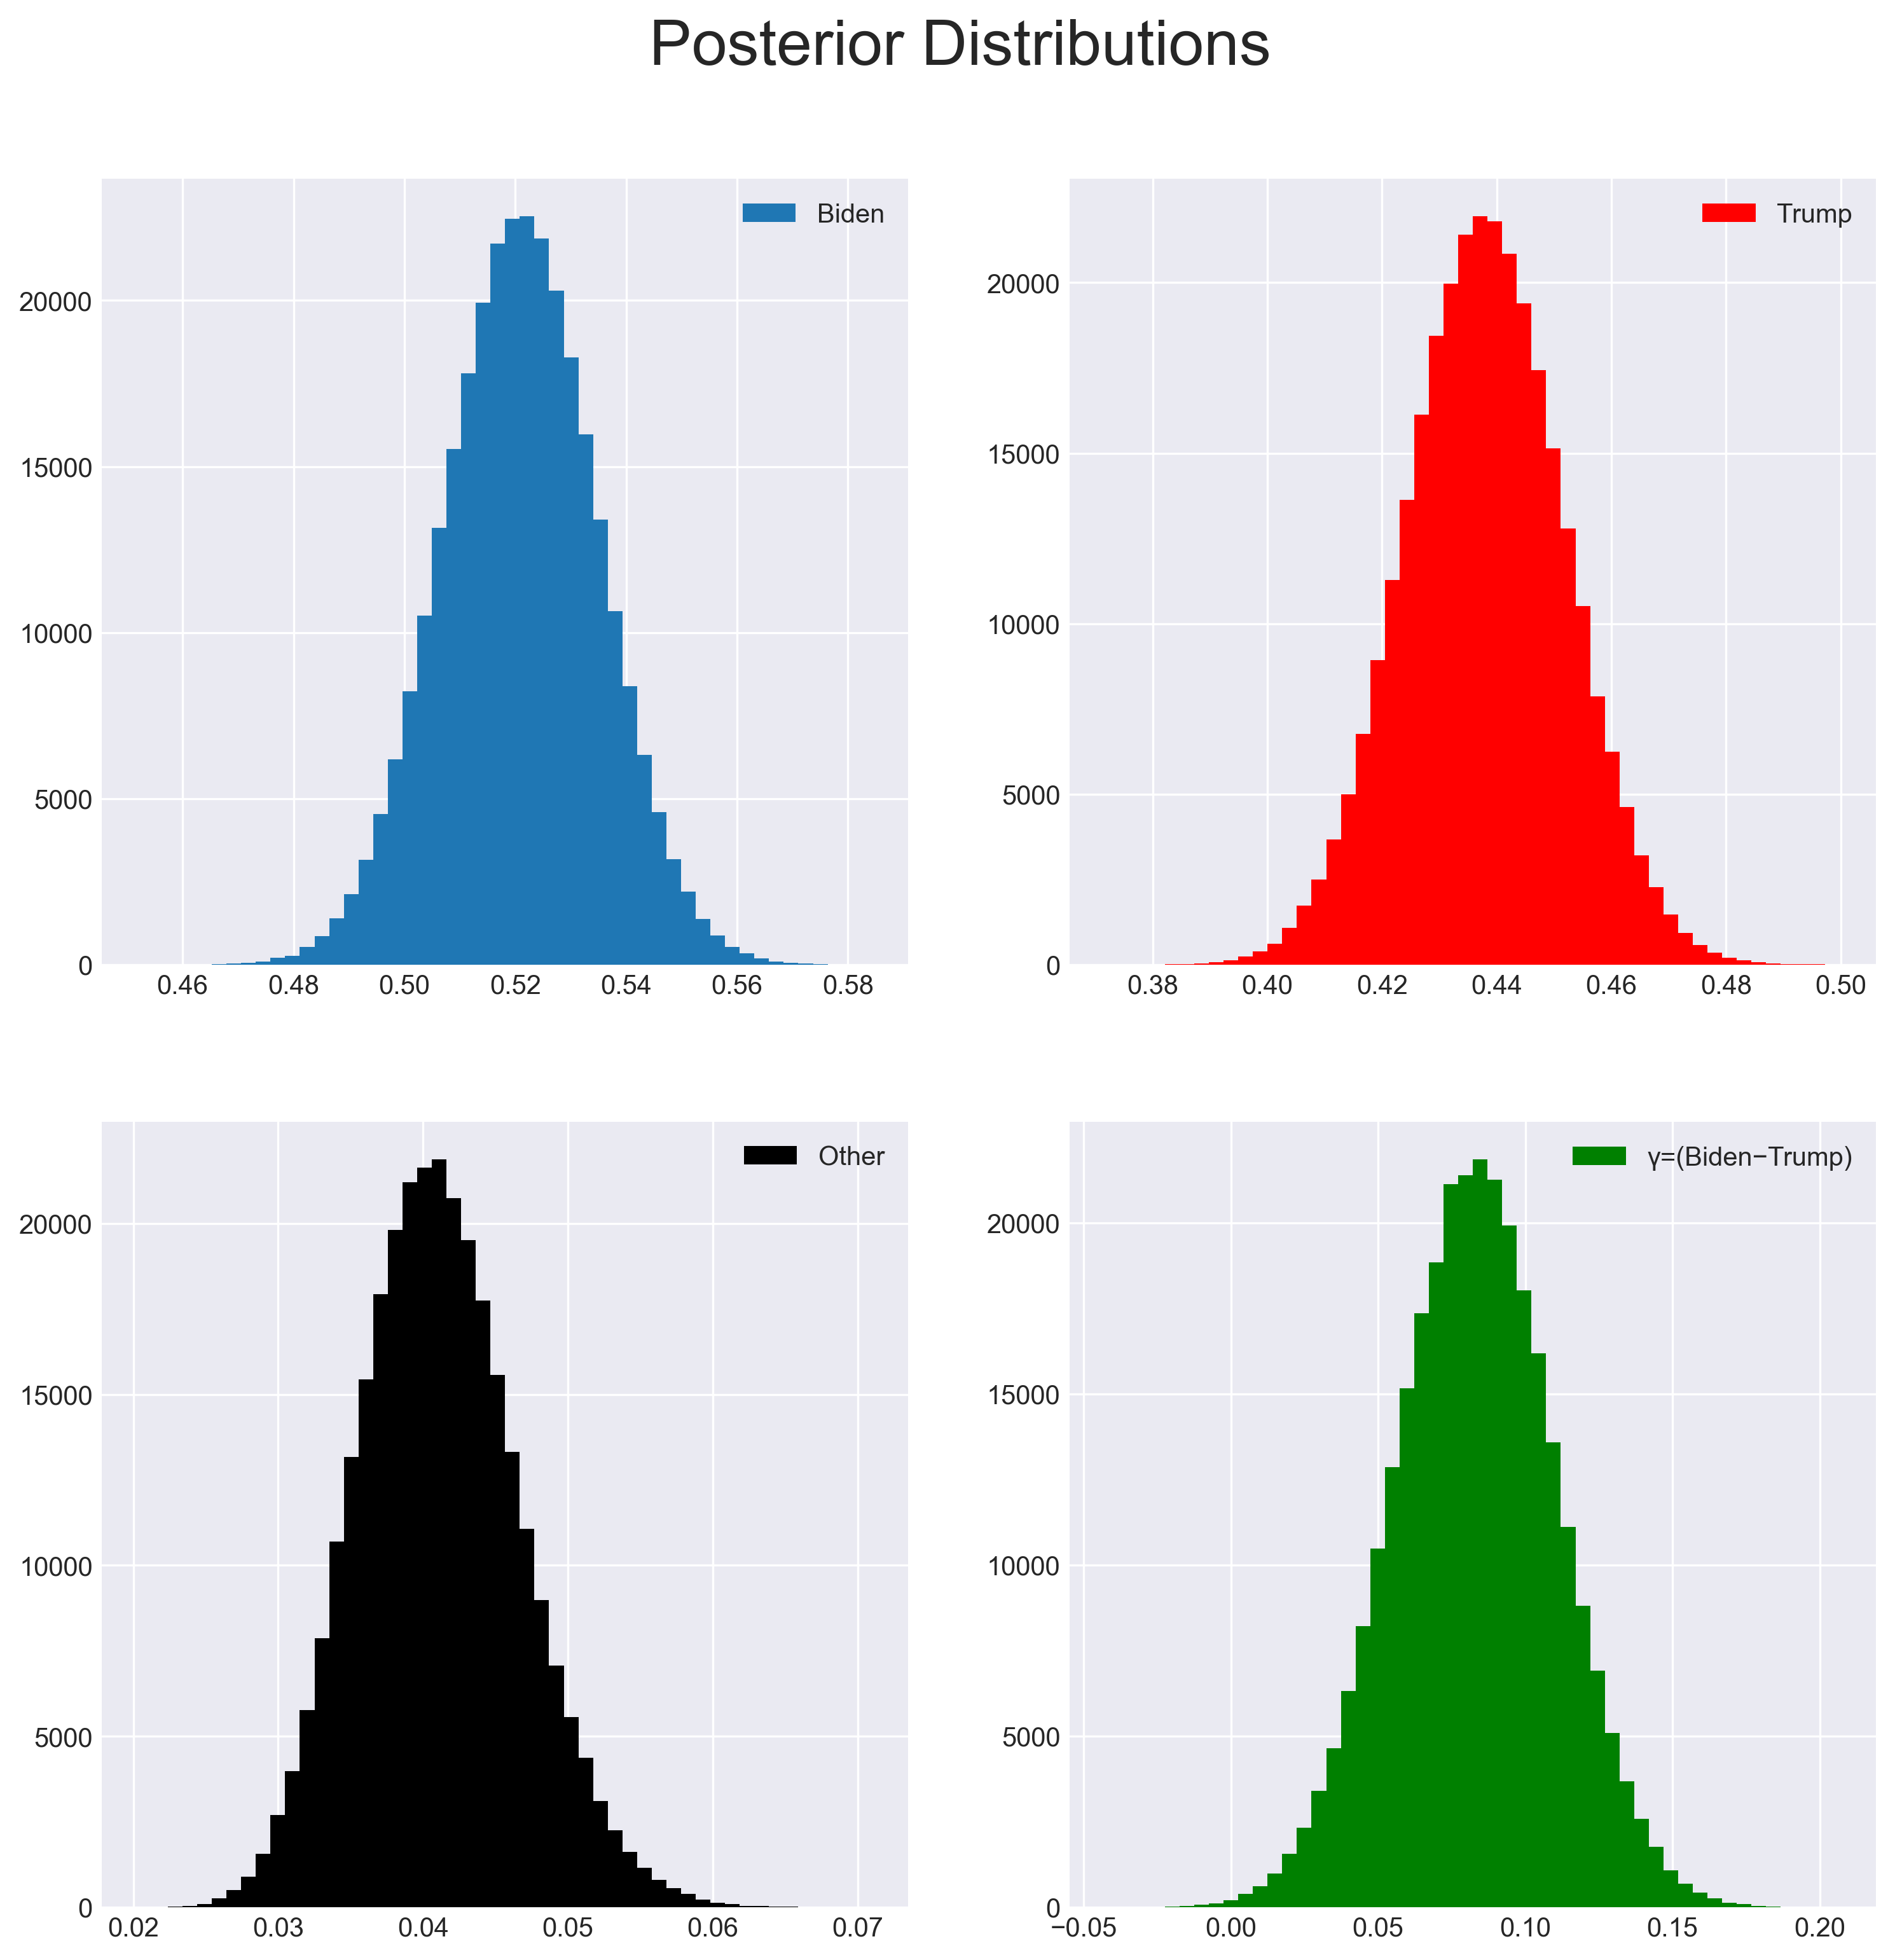

In [16]:
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 12), dpi=300)
ax1.hist(post[:, 0], bins=50, label='Biden')
ax2.hist(post[:, 1], bins=50, label='Trump', color='r')
ax3.hist(post[:, 2], bins=50, label='Other', color='k')
ax4.hist(biden_lead, bins=50, label='γ=(Biden−Trump)', color='g')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
fig.suptitle('Posterior Distributions', y=0.95, fontsize=24)

# f(iv)
[back to top](#THT2)

In [17]:
t1_mcse = np.sqrt((np.cov(post[:, 0])/M))
t2_mcse = np.sqrt((np.cov(post[:, 1])/M))
t3_mcse = np.sqrt((np.cov(post[:, 2])/M))
gamma_mcse = np.sqrt((np.cov(biden_lead)/M))
t1_mean = post[:, 0].mean()
t2_mean = post[:, 1].mean()
t3_mean = post[:, 2].mean()
gamma_mean = biden_lead.mean()
print("Biden Monte Carlo Mean: {:.3f}, SE: {:.6f} ".format(t1_mean, t1_mcse))
print("Trump Monte Carlo Mean/SE: {:.3f} {:.6f}".format(t2_mean, t2_mcse))
print("Other Monte Carlo Mean/SE: {:.3f} {:.6f}".format(t3_mean, t3_mcse))
print("gamma Monte Carlo Mean/SE: {:.3f}, {:.6f}".format(gamma_mean, gamma_mcse))

Biden Monte Carlo Mean: 0.521, SE: 0.000026 
Trump Monte Carlo Mean/SE: 0.438 0.000025
Other Monte Carlo Mean/SE: 0.041 0.000010
gamma Monte Carlo Mean/SE: 0.083, 0.000050


In [18]:
df['MC Mean'] = np.array([t1_mean, t2_mean, t3_mean]).round(3)
df['MC SE'] = np.array([t1_mcse, t2_mcse, t3_mcse]).round(6)
display(df.head())

,likelihood,sd/se,MC Mean,MC SE
Biden,0.521,0.014,0.521,0.000026
Trump,0.438,0.014,0.438,0.000025
other,0.041,0.006,0.041,0.000010


$$ \gamma = (\theta_1 - \theta_2) $$

# f(v)
[back to top](#THT2)

In [19]:
P_biden_win = (biden_lead > 0).mean()
P_biden_win_mcse = ((P_biden_win*(1-P_biden_win))/M)**0.5
P_biden_win_LCB = P_biden_win - (stats.norm.ppf(1-0.001)*P_biden_win_mcse)
P_biden_win_LCB

0.9985038961951802

# 2B
## Table-2
[back to top](#THT2)

In [20]:
study = ['UK-1', 'CDPA', 'GAMS', 'UK-2', 'PARIS', 'AMIS']
aspirin_n = [615, 758, 317, 832, 810, 2267]
aspirin_mortality = [7.97, 5.8, 8.52, 12.26, 10.49, 10.85]
placebo_n = [624, 771, 309, 850, 406, 2257]
placebo_mortality = [10.74, 8.30, 10.36, 14.82, 12.81, 9.70]

data_dict = {'study': study,
             '$$n_{T}$$': aspirin_n,
             '$$mortality_{T}$$': aspirin_mortality,
             '$$n_{C}$$': placebo_n,
             '$$mortality_{C}$$': placebo_mortality
            }

aspirin = pd.DataFrame.from_dict(data_dict)
aspirin['$$y$$'] = aspirin.iloc[:, 4].sub(aspirin.iloc[:, 2])
aspirin['$$\hat{SE}$$'] = [1.65, 1.31, 2.34, 1.67, 1.98, 0.9]
aspirin = aspirin.set_index('study')
display(aspirin.head(6))


,$$n_{T}$$,$$mortality_{T}$$,$$n_{C}$$,$$mortality_{C}$$,$$y$$,$$\hat{SE}$$
study,,,,,,
UK-1,615,7.97,624,10.74,2.77,1.65
CDPA,758,5.80,771,8.30,2.50,1.31
GAMS,317,8.52,309,10.36,1.84,2.34
UK-2,832,12.26,850,14.82,2.56,1.67
PARIS,810,10.49,406,12.81,2.32,1.98
AMIS,2267,10.85,2257,9.70,-1.15,0.90


# (c)
[back to top](#THT2)

In [21]:
def llh_aspirin_mortality(mu, sigma, y, var):
    llh = -0.5 * np.sum(np.log(var + sigma**2) + (y-mu)**2 / (var+sigma**2))
    return llh
n_grid = 50
mu_grid = np.linspace(0.86-(4*0.59), 0.86+(4*0.59), num=n_grid)
sigma_grid = np.linspace(0, 3*np.std(aspirin.iloc[:, 4]), num=n_grid)

ll_grid = np.zeros((n_grid, n_grid))

In [22]:
for i in range(n_grid):
    for j in range(n_grid):
        ll_grid[j, i] = llh_aspirin_mortality(mu_grid[i], sigma_grid[j], aspirin.iloc[:, 4], aspirin.iloc[:, 5]**2)

Text(0.5, 1.0, 'Log-Likelihood')

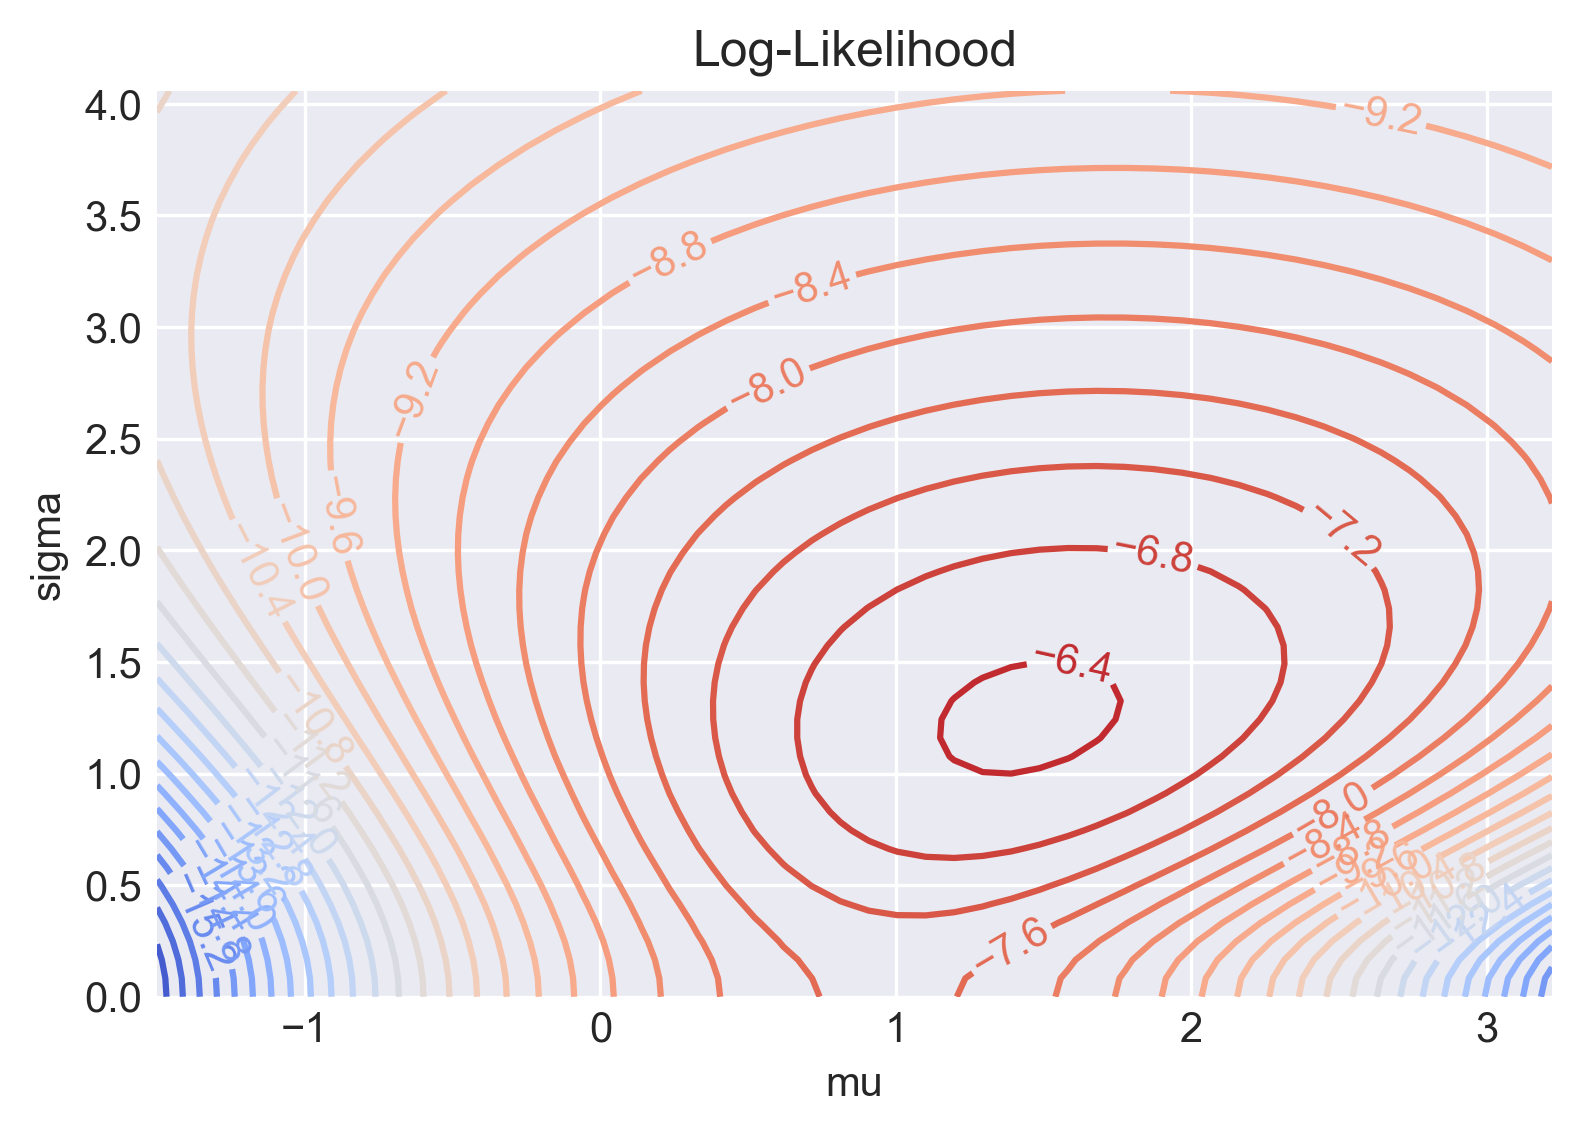

In [23]:
fig, ax = plt.subplots(dpi=300)
plot = ax.contour(mu_grid, sigma_grid, ll_grid, cmap='coolwarm', levels=30)
plt.xlabel('mu')
plt.ylabel('sigma')
ax.clabel(plot, inline=1, fontsize=10)
plt.title('Log-Likelihood')

Text(0.5, 0, 'log-likelihood')

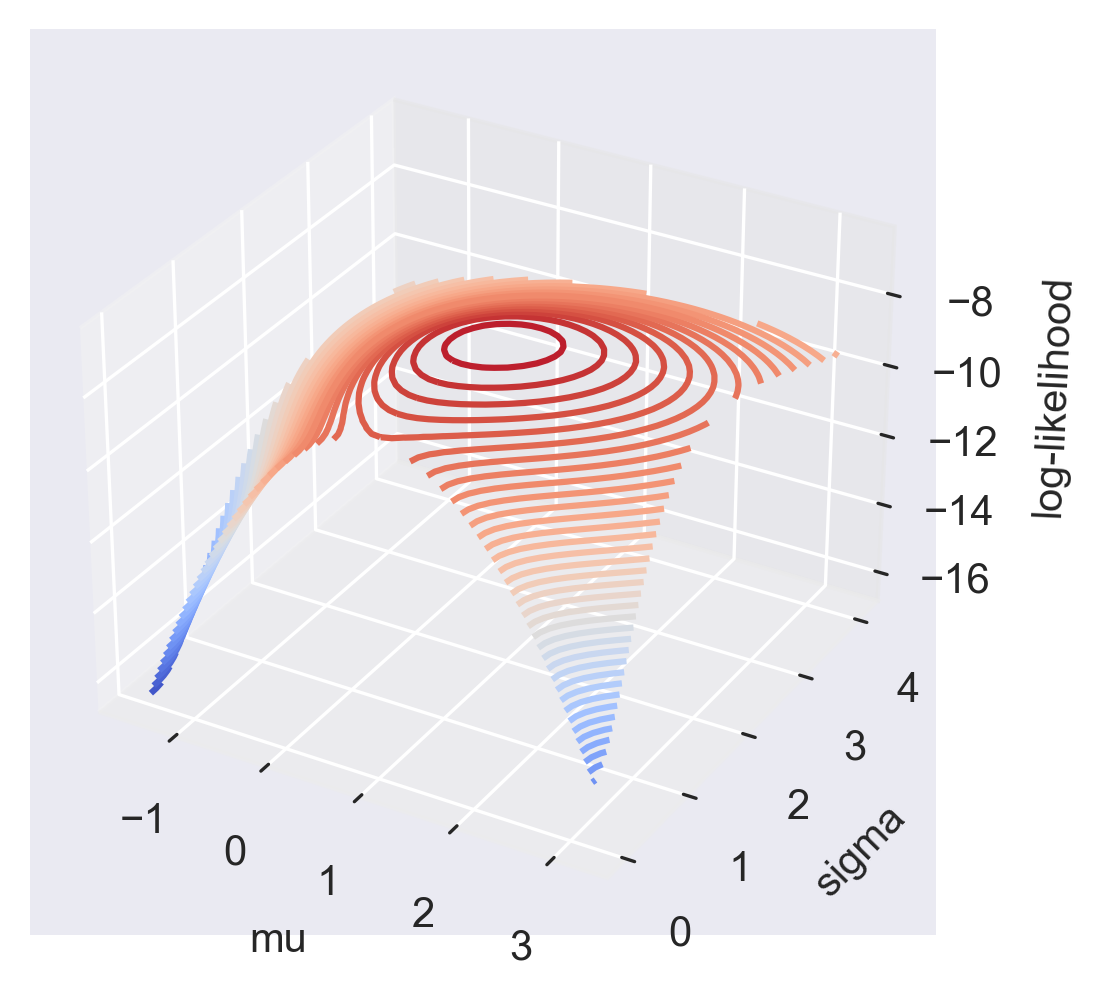

In [24]:
from mpl_toolkits import mplot3d

fig = plt.figure(dpi=300)
ax = plt.axes(projection='3d')
ax.contour3D(mu_grid, sigma_grid, ll_grid, 50, cmap='coolwarm')
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('log-likelihood')

Text(0.5, 1.0, 'Likelihood')

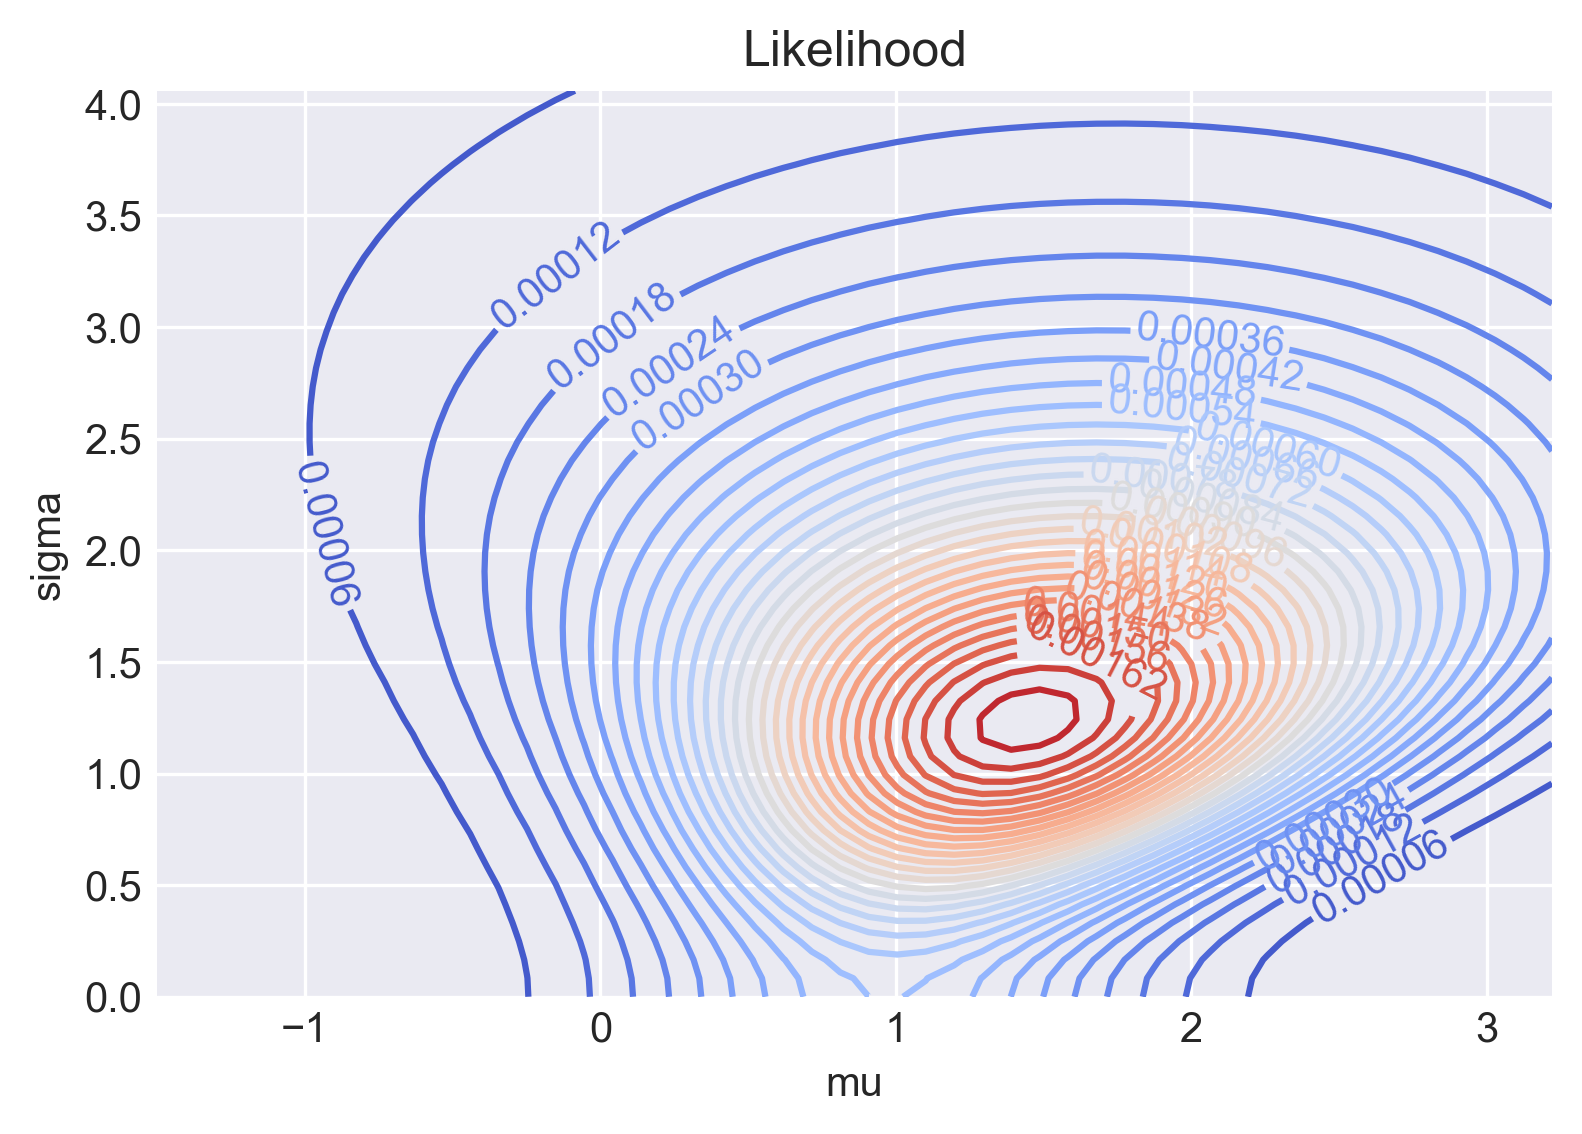

In [25]:
fig, ax = plt.subplots(dpi=300)
plot = ax.contour(mu_grid, sigma_grid, np.exp(ll_grid), cmap='coolwarm', levels=30)
plt.xlabel('mu')
plt.ylabel('sigma')
ax.clabel(plot, inline=1, fontsize=10)
plt.title('Likelihood')

Text(0.5, 0, 'likelihood')

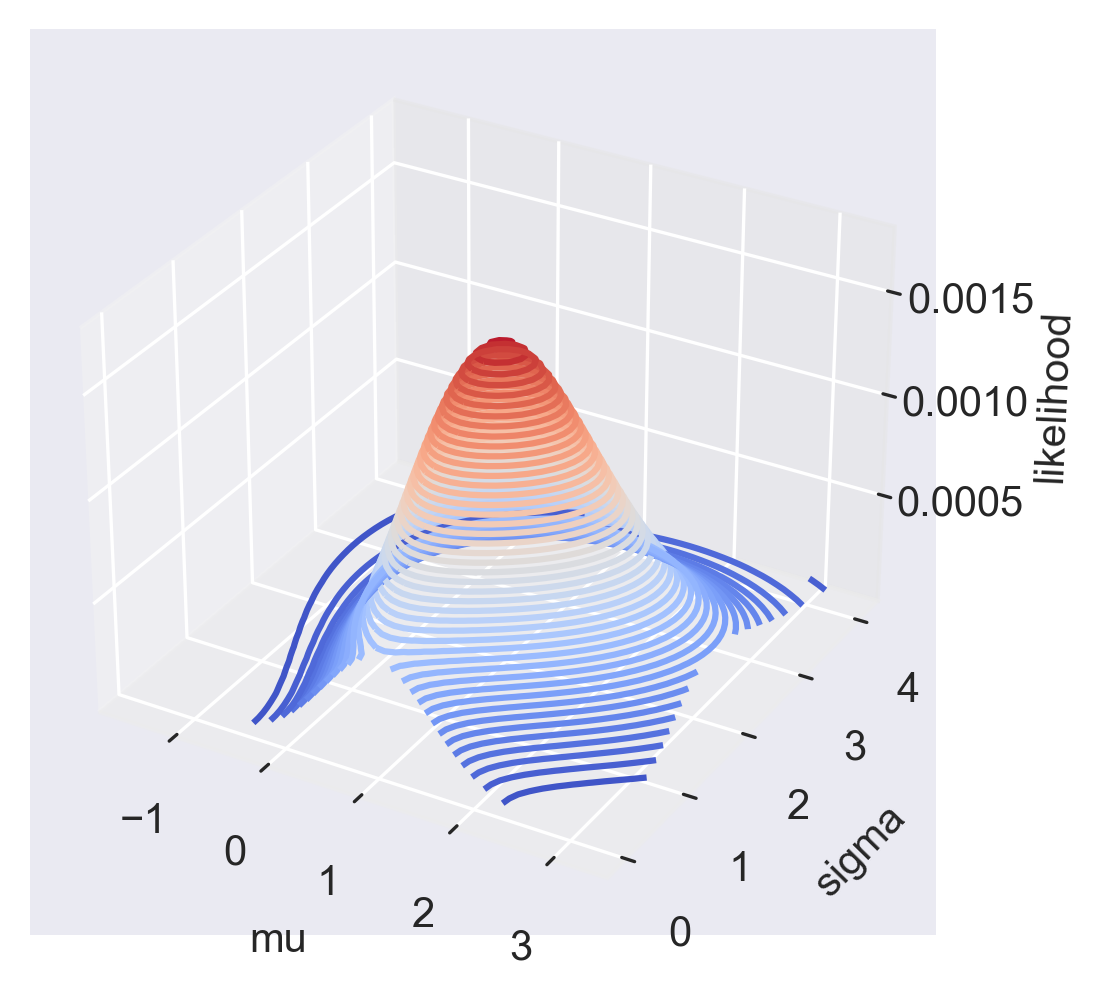

In [26]:
from mpl_toolkits import mplot3d

fig = plt.figure(dpi=300)
ax = plt.axes(projection='3d')
ax.contour3D(mu_grid, sigma_grid, np.exp(ll_grid), 50, cmap='coolwarm')
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('likelihood')

# (d)
[back to top](#THT2)

In [27]:
y = aspirin.iloc[:,4]
var = aspirin.iloc[:,5].pow(2)
def llh_optimization(parameters, y=y, var=var):
    mu=parameters[0]
    sigma=parameters[1]
    llh = 0.5 * np.sum(np.log(var + sigma**2) + (y-mu)**2 / (var+sigma**2))
    return llh

In [28]:
from scipy.optimize import minimize
llh_model = minimize(llh_optimization, np.array([1.5, 1.25]))
llh_model

      fun: 6.332310523909327
 hess_inv: array([[0.71161902, 0.16322374],
       [0.16322374, 0.47871215]])
      jac: array([4.17232513e-07, 2.02655792e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([1.44686915, 1.237237  ])

In [29]:
SE_mle = np.sqrt(np.diag(llh_model['hess_inv']))
SE_mle

array([0.84357514, 0.69189027])

In [30]:
# 99.9% Lower confidence bound for mu
(llh_model['x'][0] - (norm.ppf(1-0.001)*SE_mle[0])).round(3)

-1.16

# (e/f)
[back to top](#THT2)

In [31]:
from timeit import default_timer as timer
def empirical_bayes(y, var, epsilon, n):
    sigma_sq = [0]
    sigma_sq_hat = sigma_sq[-1]
    W_hat = 1 / (var + sigma_sq_hat)
    mu_hat = np.sum(W_hat*y) / np.sum(W_hat)
    
    sigma_sq.append(np.sum((W_hat**2) * ((y-mu_hat)**2 - var)) / np.sum(W_hat**2))
    
    m=0
    
    while(np.abs(sigma_sq[-1] - sigma_sq[-2]) > epsilon):
        W_hat = 1 / (var + sigma_sq[-1])
        mu_hat = np.sum(W_hat*y) / np.sum(W_hat)
        sigma_sq.append(np.sum((W_hat**2) * ((y-mu_hat)**2 - var)) / np.sum(W_hat**2))
        m += 1
    
    sigma_hat = np.sqrt(sigma_sq[-1])
    W_hat_normalized = W_hat / np.sum(W_hat)
    n_normalized = n / np.sum(n)
    B_hat = var / (var + sigma_sq[-1])
    theta_hat = ((1-B_hat) * y) + (B_hat * mu_hat)
    se_mu = 1 / np.sqrt(np.sum(1 / (var+sigma_sq[-1])))
    se_theta = np.sqrt(var* (1-B_hat))
    
    return [sigma_hat.round(3), sigma_sq[-1].round(3), mu_hat.round(3), m, se_mu.round(3)], \
            W_hat_normalized, B_hat, theta_hat, se_theta, n_normalized

In [32]:
_ys = aspirin.iloc[:, 4]
_vars = aspirin.iloc[:, 5].pow(2)

epsilon = 10**(-7)

n_T = aspirin.iloc[:, 0]
n_C = aspirin.iloc[:, 2]
_n = n_T + n_C

start = timer()
result, W_hat, B_hat, theta_hat, se_theta, n_normalized = empirical_bayes(_ys, _vars, epsilon, _n)
end = timer()
runtime = end-start
print('time {time:.3f} seconds'.format(time=runtime))

var_names=['sigma MLE:', 'sigma squared MLE:', 'mu_hat:', 'm:', 'se mu:']
for r in range(5):
    print(var_names[r], result[r])

time 0.099 seconds
sigma MLE: 1.237
sigma squared MLE: 1.531
mu_hat: 1.447
m: 35
se mu: 0.809


In [33]:
aspirin['$$N$$'] = aspirin.iloc[:, 0].add(aspirin.iloc[:, 2])
aspirin['$$\hat{W}$$'] = W_hat.round(3)
aspirin['$$\hat{B}$$'] = B_hat.round(3)
aspirin['$$\hat{\theta}$$'] = theta_hat.round(3)
aspirin['$$\hat{\sigma_\theta}$$'] = se_theta.round(3)
aspirin['$$p$$'] = n_normalized.round(3)
display(aspirin.head(6))

,$$n_{T}$$,$$mortality_{T}$$,$$n_{C}$$,$$mortality_{C}$$,$$y$$,$$\hat{SE}$$,$$N$$,$$\hat{W}$$,$$\hat{B}$$,$$\hat{\theta}$$,$$\hat{\sigma_\theta}$$,$$p$$
study,,,,,,,,,,,,
UK-1,615,7.97,624,10.74,2.77,1.65,1239,0.154,0.640,1.923,0.990,0.115
CDPA,758,5.80,771,8.30,2.50,1.31,1529,0.202,0.529,1.943,0.899,0.141
GAMS,317,8.52,309,10.36,1.84,2.34,626,0.093,0.782,1.533,1.094,0.058
UK-2,832,12.26,850,14.82,2.56,1.67,1682,0.152,0.646,1.841,0.994,0.156
PARIS,810,10.49,406,12.81,2.32,1.98,1216,0.120,0.719,1.692,1.049,0.112
AMIS,2267,10.85,2257,9.70,-1.15,0.90,4524,0.280,0.346,-0.251,0.728,0.418


In [34]:
print(round(aspirin.iloc[:, 9].mean(),3))

1.447


# (g/h) 
### *used R code because I couldn't get pyjags to install*
[back to top](#THT2)

In [35]:
alpha = 0.001
sigma_mle = (1.237, 0.6791)
lb = sigma_mle[0] + (norm.ppf(alpha/2) * sigma_mle[1])
ub = sigma_mle[0] + (norm.ppf(1-alpha/2) * sigma_mle[1])
print(lb, ub)


-0.9975967033561455 3.471596703356167
